In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/My\ Drive/Datasets/padhai/task_02

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Datasets/padhai/task_02


In [2]:
# Required libraries
import os
import codecs
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# reading image directories and annotations
f = codecs.open('annotations.txt', encoding='utf-8')
d = {}
e = {}
for x in f:
  i = x.split('\t')
  if(i[1] not in d):
    d[i[1]] = []
    e[i[1]] = 0
  d[i[1]].append(i[0])
  e[i[1]] += 1

In [4]:
nd = {}
for i in d:
  if(e[i]>=30):
    nd[i] = d[i]

In [5]:
map_val = {}
val = 0
for i in nd:
  if(i not in map_val):
    map_val[i] = val
    val += 1

In [6]:
train_images=[]
train_labels=[]

In [7]:
# Preparing train data
for i in nd:
  for j in nd[i]:
    image = cv2.imread(j)
    img = cv2.resize(image, (300,300), interpolation = cv2.INTER_AREA)
    train_images.append(img)
    train_labels.append(map_val[i])

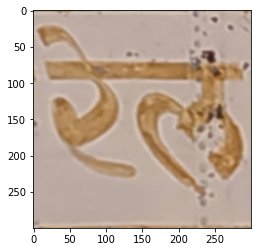

In [8]:
plt.imshow(img)

In [9]:
X = np.array(train_images)
Y = np.array(train_labels)

In [10]:
# Functions for modeling
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AvgPool2D, Dense, Flatten, Dropout, LeakyReLU, ReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, shuffle=True, stratify=Y, random_state=0)

In [12]:
# CNN architecture to classify
model = Sequential([
    
    #Convolutional layers
    
    Conv2D(10, kernel_size=(3,3), strides=(2,2), input_shape=(300,300,3), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(10, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    Dropout(0.25),
    MaxPooling2D(pool_size=(3,3), strides=(1,1)),
    Dropout(0.15),
    Conv2D(5, kernel_size=(5,5), strides=(2,2), activation='relu'),
    Dropout(0.25),
    Flatten(),
    
    #Linear Layers
    
   Dense(30, activation='relu'),
   Dropout(0.25),
   Dense(30, activation='relu'),
   Dropout(0.25),
   Dense(20, activation='softmax')
  
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 149, 149, 10)      280       
_________________________________________________________________
dropout (Dropout)            (None, 149, 149, 10)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 10)        2510      
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 10)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 10)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 72, 72, 10)        0

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Acc. of about ~70% is achieved
model.fit(X_train, y_train, epochs=1, validation_data=(X_test,y_test))

3/3 [==============================] - 2s 528ms/step - loss: 6.1757 - accuracy: 0.4896 - val_loss: 0.7459 - val_accuracy: 0.6667
